In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install -U scikit-learn==1.2.2 imbalanced-learn==0.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [3]:
df = pd.read_csv ('/kaggle/input/smoking-drinking-dataset/smoking_driking_dataset_Ver01.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [5]:
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


In [6]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [7]:
for col in df.columns:
    print(f"Distribusi setiap value pada kolom '{col}':")
    print(df[col].value_counts())
    print ("-" * 50)

Distribusi setiap value pada kolom 'sex':
sex
Male      526415
Female    464931
Name: count, dtype: int64
--------------------------------------------------
Distribusi setiap value pada kolom 'age':
age
40    130385
50    129434
45    118355
55    111223
60    106063
35     84726
30     77600
25     64370
65     52961
70     50666
75     25333
20     21971
80     14968
85      3291
Name: count, dtype: int64
--------------------------------------------------
Distribusi setiap value pada kolom 'height':
height
160    181809
165    178228
170    166328
155    165678
150    107929
175     98850
145     39176
180     35970
140      9100
185      6588
135      1241
190       363
130        86
Name: count, dtype: int64
--------------------------------------------------
Distribusi setiap value pada kolom 'weight':
weight
60     151134
55     150415
65     141241
50     125079
70     122281
75      90207
45      63047
80      58176
85      33708
90      18250
40      16639
95       9655
100    

In [8]:
print(df.duplicated().sum())
df = df.drop_duplicates()

26


SMK_stat_type_cd
1.0    602431
3.0    213945
2.0    174944
Name: count, dtype: int64


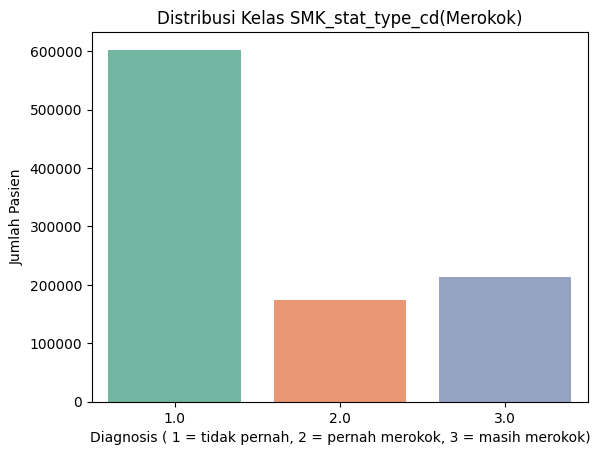

In [9]:
print(df['SMK_stat_type_cd'].value_counts())

sns.countplot(x='SMK_stat_type_cd', data=df, palette='Set2')
plt.title('Distribusi Kelas SMK_stat_type_cd(Merokok)')
plt.xlabel('Diagnosis ( 1 = tidak pernah, 2 = pernah merokok, 3 = masih merokok)')
plt.ylabel('Jumlah Pasien')
plt.show()

DRK_YN
N    495844
Y    495476
Name: count, dtype: int64


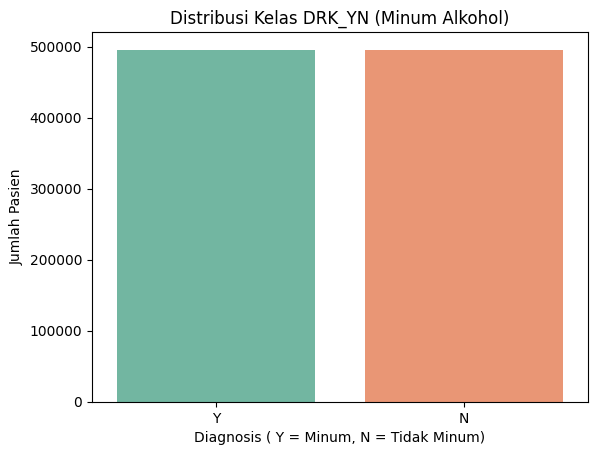

In [10]:
print(df['DRK_YN'].value_counts())

sns.countplot(x='DRK_YN', data=df, palette='Set2')
plt.title('Distribusi Kelas DRK_YN (Minum Alkohol)')
plt.xlabel('Diagnosis ( Y = Minum, N = Tidak Minum)')
plt.ylabel('Jumlah Pasien')
plt.show()

In [11]:
df.loc[:, 'label_gabungan'] = df['SMK_stat_type_cd'].astype(str) + '_' + df['DRK_YN']

/tmp/ipykernel_19/2640863430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'label_gabungan'] = df['SMK_stat_type_cd'].astype(str) + '_' + df['DRK_YN']


label_gabungan
1.0_N    389000
1.0_Y    213431
3.0_Y    161572
2.0_Y    120473
2.0_N     54471
3.0_N     52373
Name: count, dtype: int64


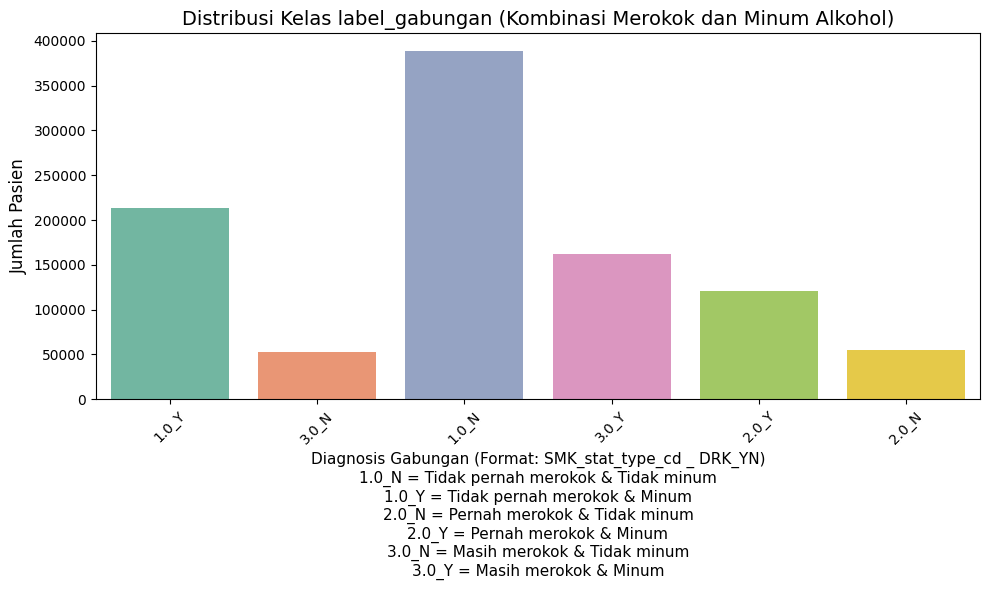

In [12]:
print(df['label_gabungan'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='label_gabungan', data=df, palette='Set2')

plt.title('Distribusi Kelas label_gabungan (Kombinasi Merokok dan Minum Alkohol)', fontsize=14)
plt.xlabel('Diagnosis Gabungan (Format: SMK_stat_type_cd _ DRK_YN)\n'
           '1.0_N = Tidak pernah merokok & Tidak minum\n'
           '1.0_Y = Tidak pernah merokok & Minum\n'
           '2.0_N = Pernah merokok & Tidak minum\n'
           '2.0_Y = Pernah merokok & Minum\n'
           '3.0_N = Masih merokok & Tidak minum\n'
           '3.0_Y = Masih merokok & Minum', fontsize=11)
plt.ylabel('Jumlah Pasien', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.loc[:, 'label_encoded'] = le.fit_transform(df['label_gabungan'])
print(le.classes_)

['1.0_N' '1.0_Y' '2.0_N' '2.0_Y' '3.0_N' '3.0_Y']


/tmp/ipykernel_19/1982772888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'label_encoded'] = le.fit_transform(df['label_gabungan'])


In [14]:
df[['label_gabungan', 'label_encoded']].head(10)

,label_gabungan,label_encoded
0,1.0_Y,1
1,3.0_N,4
2,1.0_N,0
3,1.0_N,0
4,1.0_N,0
5,3.0_Y,5
6,1.0_N,0
7,3.0_Y,5
8,1.0_Y,1
9,2.0_Y,3


In [15]:
X = df.drop(columns=['label_gabungan', 'label_encoded', 'SMK_stat_type_cd', 'DRK_YN'])
y = df['label_encoded']

In [16]:
from sklearn.model_selection import train_test_split

# Split awal 80% (train+val) vs 20% (test)
X_temp, X_test, y_temp, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

# train (87.5%) dan val (12.5%) dari 80%
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp,test_size=0.125, random_state=42,stratify=y_temp)

In [17]:
print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (693924, 22)
Validation: (99132, 22)
Test: (198264, 22)


In [18]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

X_train = X_train.copy()
X_val = X_val.copy()
X_test = X_test.copy()

le_sex = LabelEncoder()
X_train['sex'] = le_sex.fit_transform(X_train['sex'])
X_val['sex'] = le_sex.transform(X_val['sex'])
X_test['sex'] = le_sex.transform(X_test['sex'])

for col in ['hear_left', 'hear_right']:
    X_train[col] = X_train[col].astype(int) - 1
    X_val[col] = X_val[col].astype(int) - 1
    X_test[col] = X_test[col].astype(int) - 1

X_train['urine_protein'] = X_train['urine_protein'].astype(int)
X_val['urine_protein'] = X_val['urine_protein'].astype(int)
X_test['urine_protein'] = X_test['urine_protein'].astype(int)

kolom_numerik = [
    'age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right',
    'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride',
    'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'
]

scaler = MinMaxScaler()
X_train[kolom_numerik] = scaler.fit_transform(X_train[kolom_numerik])
X_val[kolom_numerik] = scaler.transform(X_val[kolom_numerik])
X_test[kolom_numerik] = scaler.transform(X_test[kolom_numerik])


In [19]:
X_train.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP
666438,0,0.461538,0.416667,0.217391,0.066902,0.081633,0.071429,0,0,0.197044,...,0.073869,0.007153,0.019734,0.014965,0.550000,1,0.008172,0.003001,0.004994,0.043086
373755,1,0.461538,0.666667,0.347826,0.075681,0.071429,0.040816,0,0,0.433498,...,0.080794,0.005919,0.025205,0.013279,0.629167,1,0.007150,0.004001,0.002913,0.032064
972257,1,0.461538,0.583333,0.391304,0.078708,0.061224,0.142857,0,0,0.226601,...,0.062789,0.007399,0.017194,0.008115,0.658333,1,0.009193,0.002501,0.003052,0.040080
308310,1,0.384615,0.500000,0.304348,0.071645,0.112245,0.091837,0,0,0.147783,...,0.069714,0.007399,0.018757,0.011592,0.591667,1,0.007150,0.003401,0.006381,0.033066
421523,0,0.538462,0.333333,0.260870,0.070030,0.040816,0.040816,0,0,0.334975,...,0.079871,0.007153,0.023642,0.011382,0.520833,1,0.008172,0.002801,0.002358,0.017034


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)
print("=== Evaluasi pada Validation Set ===")
print(classification_report(y_val, y_val_pred))

y_test_pred = model.predict(X_test)
print("=== Evaluasi pada Test Set ===")
print(classification_report(y_test, y_test_pred))

=== Evaluasi pada Validation Set ===
              precision    recall  f1-score   support

           0       0.66      0.80      0.73     38900
           1       0.44      0.24      0.31     21343
           2       0.26      0.09      0.13      5447
           3       0.32      0.34      0.33     12047
           4       0.26      0.04      0.08      5237
           5       0.42      0.64      0.50     16158

    accuracy                           0.52     99132
   macro avg       0.39      0.36      0.35     99132
weighted avg       0.49      0.52      0.49     99132

=== Evaluasi pada Test Set ===
              precision    recall  f1-score   support

           0       0.66      0.81      0.73     77800
           1       0.44      0.25      0.32     42686
           2       0.24      0.09      0.13     10894
           3       0.31      0.32      0.32     24095
           4       0.29      0.05      0.08     10475
           5       0.42      0.64      0.51     32314

    accur

In [21]:
pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [22]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import classification_report
import numpy as np

X_train_np = X_train.to_numpy().astype('float32')
X_val_np = X_val.to_numpy().astype('float32')
X_test_np = X_test.to_numpy().astype('float32')

y_train_np = y_train.to_numpy().astype('int64')
y_val_np = y_val.to_numpy().astype('int64')
y_test_np = y_test.to_numpy().astype('int64')

tabnet_model = TabNetClassifier(seed=42)

tabnet_model.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_name=['val'],
    eval_metric=['accuracy'],
    max_epochs=30,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128
)

y_val_pred = tabnet_model.predict(X_val_np)
print("=== Evaluasi pada Validation Set ===")
print(classification_report(y_val_np, y_val_pred))

y_test_pred = tabnet_model.predict(X_test_np)
print("=== Evaluasi pada Test Set ===")
print(classification_report(y_test_np, y_test_pred))

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.23674 | val_accuracy: 0.50593 |  0:00:30s
epoch 1  | loss: 1.18894 | val_accuracy: 0.52011 |  0:00:59s
epoch 2  | loss: 1.18218 | val_accuracy: 0.51952 |  0:01:28s
epoch 3  | loss: 1.17885 | val_accuracy: 0.52114 |  0:01:57s
epoch 4  | loss: 1.17744 | val_accuracy: 0.51685 |  0:02:26s
epoch 5  | loss: 1.17642 | val_accuracy: 0.52251 |  0:02:55s
epoch 6  | loss: 1.17576 | val_accuracy: 0.52167 |  0:03:24s
epoch 7  | loss: 1.1749  | val_accuracy: 0.5235  |  0:03:53s
epoch 8  | loss: 1.17426 | val_accuracy: 0.5206  |  0:04:22s
epoch 9  | loss: 1.1753  | val_accuracy: 0.52571 |  0:04:51s
epoch 10 | loss: 1.17421 | val_accuracy: 0.52084 |  0:05:20s
epoch 11 | loss: 1.17373 | val_accuracy: 0.52243 |  0:05:49s
epoch 12 | loss: 1.17358 | val_accuracy: 0.52603 |  0:06:18s
epoch 13 | loss: 1.17191 | val_accuracy: 0.52271 |  0:06:47s
epoch 14 | loss: 1.17176 | val_accuracy: 0.51714 |  0:07:16s
epoch 15 | loss: 1.17201 | val_accuracy: 0.52504 |  0:07:45s
epoch 16 | loss: 1.17124

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


=== Evaluasi pada Validation Set ===
              precision    recall  f1-score   support

           0       0.65      0.81      0.72     38900
           1       0.46      0.26      0.33     21343
           2       0.23      0.04      0.07      5447
           3       0.33      0.39      0.36     12047
           4       0.29      0.09      0.14      5237
           5       0.45      0.59      0.51     16158

    accuracy                           0.53     99132
   macro avg       0.40      0.36      0.36     99132
weighted avg       0.49      0.53      0.49     99132

=== Evaluasi pada Test Set ===
              precision    recall  f1-score   support

           0       0.65      0.81      0.72     77800
           1       0.46      0.27      0.34     42686
           2       0.24      0.04      0.07     10894
           3       0.33      0.38      0.35     24095
           4       0.29      0.09      0.13     10475
           5       0.45      0.59      0.51     32314

    accur

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [24]:
# Sebelum SMOTE
print("Distribusi label sebelum SMOTE:")
print(y_train.value_counts())

# Sesudah SMOTE
print("\nDistribusi label sesudah SMOTE:")
print(y_train_bal.value_counts())

Distribusi label sebelum SMOTE:
label_encoded
0    272300
1    149402
5    113100
3     84331
2     38130
4     36661
Name: count, dtype: int64

Distribusi label sesudah SMOTE:
label_encoded
1    272300
3    272300
0    272300
5    272300
2    272300
4    272300
Name: count, dtype: int64


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Latih model di data train
model = RandomForestClassifier(random_state=42)
model.fit(X_train_bal, y_train_bal)

# Prediksi di test
y_test_pred = model.predict(X_test)
print("=== Evaluasi pada Test Set ===")
print(classification_report(y_test, y_test_pred))

=== Evaluasi pada Test Set ===
              precision    recall  f1-score   support

           0       0.75      0.71      0.73     77800
           1       0.47      0.27      0.35     42686
           2       0.22      0.39      0.28     10894
           3       0.32      0.35      0.33     24095
           4       0.19      0.26      0.22     10475
           5       0.45      0.54      0.49     32314

    accuracy                           0.50    198264
   macro avg       0.40      0.42      0.40    198264
weighted avg       0.53      0.50      0.51    198264



In [26]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import classification_report
import numpy as np

X_train_np = X_train_bal.to_numpy().astype('float32')
X_val_np = X_val.to_numpy().astype('float32')
X_test_np = X_test.to_numpy().astype('float32')

y_train_np = y_train_bal.to_numpy().astype('int64')
y_val_np = y_val.to_numpy().astype('int64')
y_test_np = y_test.to_numpy().astype('int64')

tabnet_model = TabNetClassifier(seed=42)

tabnet_model.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_name=['val'],
    eval_metric=['accuracy'],
    max_epochs=30,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128
)

y_val_pred = tabnet_model.predict(X_val_np)
print("=== Evaluasi pada Validation Set ===")
print(classification_report(y_val_np, y_val_pred))

y_test_pred = tabnet_model.predict(X_test_np)
print("=== Evaluasi pada Test Set ===")
print(classification_report(y_test_np, y_test_pred))

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.43423 | val_accuracy: 0.495   |  0:01:05s
epoch 1  | loss: 1.38627 | val_accuracy: 0.44893 |  0:02:11s
epoch 2  | loss: 1.37976 | val_accuracy: 0.4846  |  0:03:17s
epoch 3  | loss: 1.37512 | val_accuracy: 0.459   |  0:04:23s
epoch 4  | loss: 1.37281 | val_accuracy: 0.47572 |  0:05:28s
epoch 5  | loss: 1.37256 | val_accuracy: 0.45416 |  0:06:33s
epoch 6  | loss: 1.37073 | val_accuracy: 0.47727 |  0:07:39s
epoch 7  | loss: 1.36977 | val_accuracy: 0.47776 |  0:08:44s
epoch 8  | loss: 1.36877 | val_accuracy: 0.48054 |  0:09:50s
epoch 9  | loss: 1.36802 | val_accuracy: 0.47426 |  0:10:55s
epoch 10 | loss: 1.36755 | val_accuracy: 0.48308 |  0:12:01s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_accuracy = 0.495


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


=== Evaluasi pada Validation Set ===
              precision    recall  f1-score   support

           0       0.78      0.64      0.70     38900
           1       0.46      0.32      0.38     21343
           2       0.22      0.45      0.30      5447
           3       0.33      0.38      0.36     12047
           4       0.19      0.30      0.24      5237
           5       0.45      0.54      0.49     16158

    accuracy                           0.49     99132
   macro avg       0.41      0.44      0.41     99132
weighted avg       0.54      0.49      0.51     99132

=== Evaluasi pada Test Set ===
              precision    recall  f1-score   support

           0       0.78      0.64      0.70     77800
           1       0.46      0.33      0.38     42686
           2       0.22      0.46      0.30     10894
           3       0.33      0.38      0.35     24095
           4       0.19      0.28      0.23     10475
           5       0.45      0.55      0.50     32314

    accur

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_val, y_val_pred))
print(confusion_matrix(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70     38900
           1       0.46      0.32      0.38     21343
           2       0.22      0.45      0.30      5447
           3       0.33      0.38      0.36     12047
           4       0.19      0.30      0.24      5237
           5       0.45      0.54      0.49     16158

    accuracy                           0.49     99132
   macro avg       0.41      0.44      0.41     99132
weighted avg       0.54      0.49      0.51     99132

[[24838  6595  3005  1461  1537  1464]
 [ 5650  6855  1382  2544  1341  3571]
 [  287   162  2466  1193   721   618]
 [  203   439  2169  4611   945  3680]
 [  420   188  1145   732  1587  1165]
 [  332   719  1038  3341  2015  8713]]
